# Tensorflow load dataset

In [1]:
from  tensorflow.keras.utils import image_dataset_from_directory

In [2]:
images_train, images_test = image_dataset_from_directory(
                                                    directory = '../data/cropped_dataset/',
                                                    batch_size=32,
                                                   labels = 'inferred',
                                                   label_mode='categorical',
#       class_names=['Angela','Dwight','Jim','Kevin','Michael','Pam'],
                                                    image_size = (100,100),
                                                    seed = 42,
                                                    validation_split = 0.2,
                                                    subset = 'both',
#                                                     interpolation = 'bicubic',
                                                     crop_to_aspect_ratio = True)

Found 1091 files belonging to 6 classes.
Using 873 files for training.
Using 218 files for validation.


In [3]:
class_names = images_train.class_names

In [4]:
class_names

['Angela', 'Dwight', 'Jim', 'Kevin', 'Michael', 'Pam']

# images output

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Get one batch of images and labels

# plt.figure(figsize=(10, 10))
# for images, labels in images_train.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]] + str(images[i].numpy().astype("uint8").shape))
#     plt.axis("off")


# Base-model

In [7]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Rescaling,Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19


In [8]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained VGG16 model
model = Sequential([
    Rescaling(scale=1./255, input_shape=(100, 100, 3)),
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(130, activation='relu'),
    Dense(6, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 130)               33410     
                                                                 
 dense_2 (Dense)             (None, 6)                 7

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience = 5,restore_best_weights=True)

In [12]:
model.fit(images_train,
                  epochs = 100,batch_size=32,
               verbose=1, validation_data=images_test,
               callbacks = [es]
              )

Epoch 1/100
28/28 [==============================] - 49s 2s/step - loss: 1.8737 - accuracy: 0.2474 - val_loss: 1.5071 - val_accuracy: 0.4587
Epoch 2/100
28/28 [==============================] - 54s 2s/step - loss: 1.4714 - accuracy: 0.4330 - val_loss: 1.2766 - val_accuracy: 0.5413
Epoch 3/100
28/28 [==============================] - 57s 2s/step - loss: 1.3368 - accuracy: 0.4960 - val_loss: 1.1113 - val_accuracy: 0.5963
Epoch 4/100
28/28 [==============================] - 55s 2s/step - loss: 1.2184 - accuracy: 0.5200 - val_loss: 1.0358 - val_accuracy: 0.6147
Epoch 5/100
28/28 [==============================] - 63s 2s/step - loss: 1.0977 - accuracy: 0.5922 - val_loss: 0.9772 - val_accuracy: 0.6972
Epoch 6/100
28/28 [==============================] - 55s 2s/step - loss: 0.9759 - accuracy: 0.6163 - val_loss: 0.8173 - val_accuracy: 0.7248
Epoch 7/100
28/28 [==============================] - 52s 2s/step - loss: 0.8760 - accuracy: 0.6781 - val_loss: 0.8165 - val_accuracy: 0.7110
Epoch 8/100
2

In [13]:
# %tensorboard --logdir logs/fit

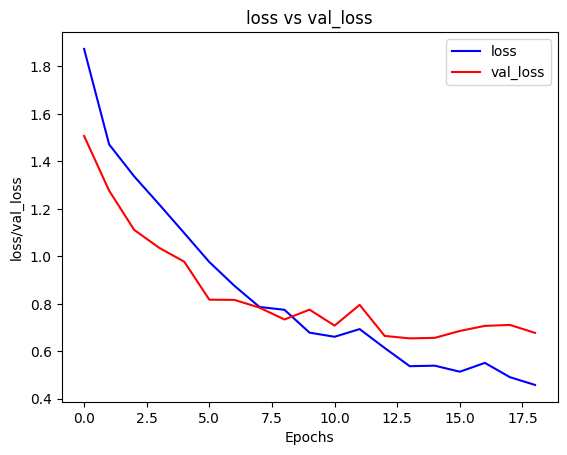

In [14]:
plt.plot(model.history.history['loss'],color='b',label='loss')
plt.plot(model.history.history['val_loss'],color='r',label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss/val_loss')
plt.title('loss vs val_loss')
plt.show()

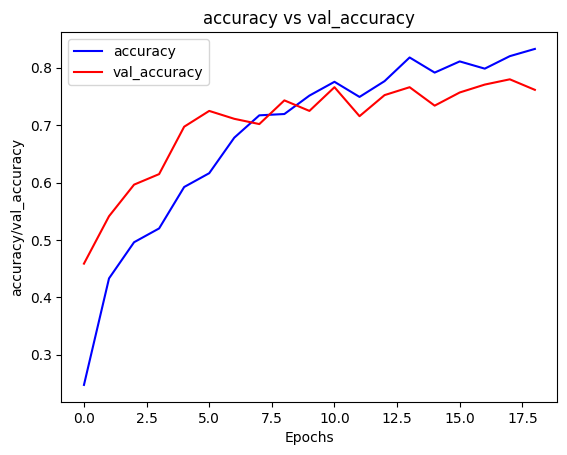

In [15]:
plt.plot(model.history.history['accuracy'],color='b',label = 'accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy/val_accuracy')
plt.title('accuracy vs val_accuracy')
plt.show()

# evaluate

In [2]:
# from mtcnn import MTCNN
# import cv2
# import os
# from glob import glob

NameError: name 'image_dataset_from_directory' is not defined

In [ ]:
# folder_list = glob(os.path.join("../../raw_data/Kaggle_clean/", '*'))
# #print(filename_list)

# filename_list = []
# for folder in folder_list:
#     filename_list.append(glob(os.path.join(folder, "*.png")))


In [ ]:
# folder_list

In [ ]:
# def crop_faces(img, image, faces):
#     if len(faces) > 0:
#         for i, face in enumerate(faces):
#             x, y, w, h = face['box']
            
#             # get face and save crop
#             face = image[y:y + h, x:x + w]
#             face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
#             cv2.imwrite(f"{img[:-4].replace('Kaggle_clean', 'cropped')}_face{i}.png", face)
#             print(f"{img[:-4].replace('Kaggle_clean', 'cropped')}_face{i}.png is saved")
#     return None   

In [ ]:
# detector = MTCNN()

# for img_path in filename_list:
#     for i, img in enumerate(img_path):
#         image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
#         #Outputs a faces list of dict, with the bounding box inside the key 'box'
#         faces = detector.detect_faces(image)
#         crop_faces(img, image, faces)

In [37]:
images_test_main = image_dataset_from_directory(
                                                   directory = '../raw_data/cast/',
                                                    labels = None,label_mode=None,
                                                    image_size = (100,100),
                                                    seed = 42,
                                                    interpolation = 'bicubic',
                                                    crop_to_aspect_ratio = True)

Found 12 files belonging to 1 classes.


In [1]:
# for images in images_test_main.take(1):
#     # Plot the images
#     fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
#     for i, ax in enumerate(axes.flatten()):
#         ax.imshow(images[i].numpy().astype("uint8"))
#         ax.axis('off')
#         ax.set_title(f'Label: {labels[i]}')
#     plt.tight_layout()
#     plt.show()

NameError: name 'images_test_main' is not defined

In [18]:
model.evaluate(images_test
              )

7/7 [==============================] - 47s 2s/step - loss: 0.6544 - accuracy: 0.7661


[0.6543810367584229, 0.7660550475120544]

In [38]:
result = model.predict(images_test_main)

1/1 [==============================] - 1s 1s/step


In [39]:
result.shape

(12, 6)

In [40]:
import numpy as np
labels = np.argmax(result,axis=1)
labels 

array([3, 0, 2, 4, 1, 1, 5, 3, 0, 4, 2, 5])

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 12 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

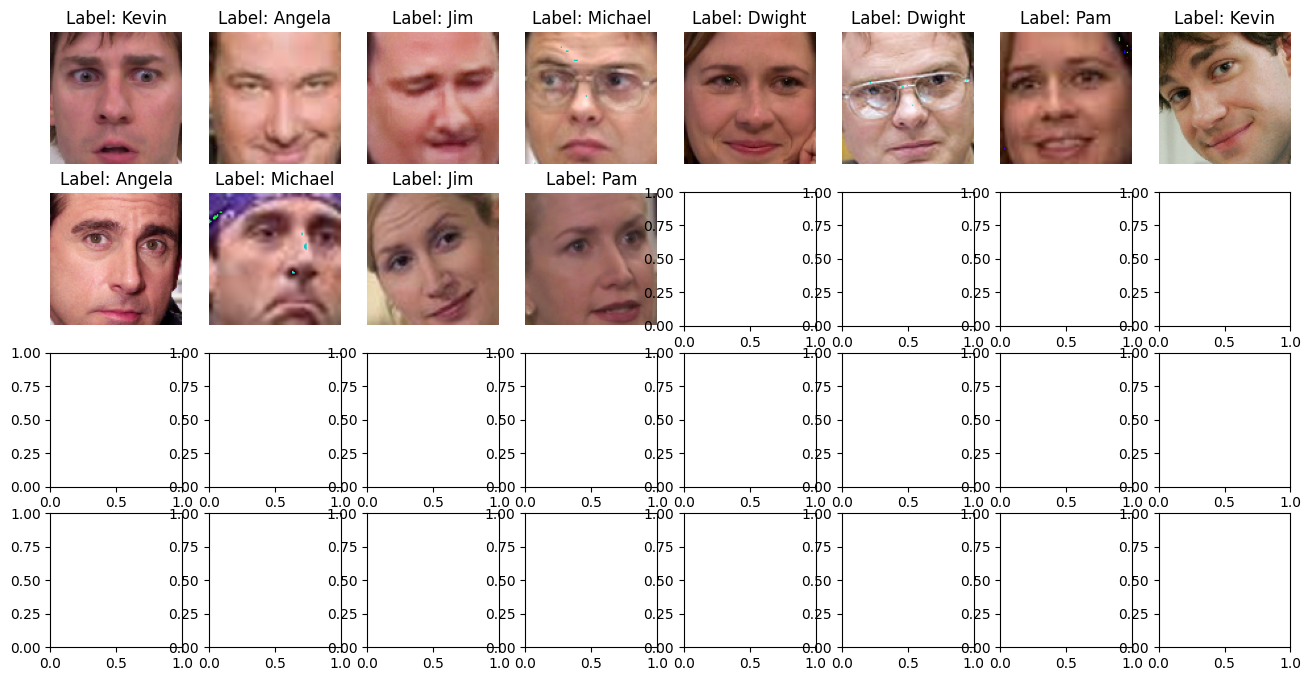

In [41]:
for images in images_test_main.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(f'Label: {class_names[labels[i]]}')
    plt.tight_layout()
    plt.show()